In [1]:
from classes_V3 import *

In [2]:
d = DC_IV('sample_4.2')

In [3]:
#d.draw_all_graphs()

In [4]:
d_2 = DC_IV('sample_4.2_2')

In [5]:
#d_2.draw_all_graphs()

In [6]:
plt.rcParams.update({'font.family':'serif'})

Text(2.9, 1e-06, 'порядок измерения')

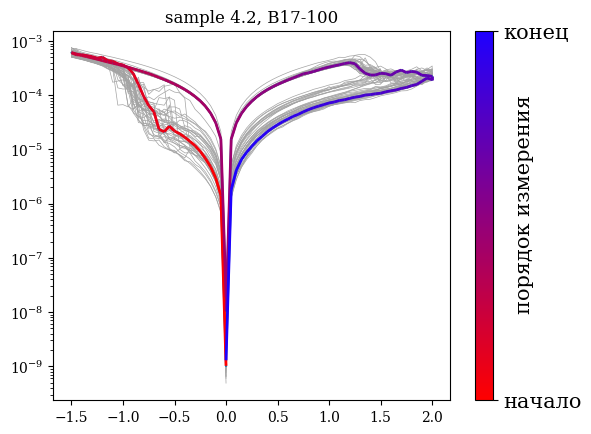

In [7]:
fig, ax = plt.subplots()
lines = d.draw_multiple_lines('B17-100', ax, measurs=[i for i in range(8, 44)], color = '#a3a3a3', linewidth = 0.5)
ax.set(yscale='log', title='sample 4.2, B17-100')
d.draw_single_line('B17-100', ax, 40)
d.colorize_line(ax, linewidth = 2)
cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#ff0000', '#1e00ff'])
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['начало','конец'], size = 15, fontfamily = 'serif')
ax.text(x=2.9, y=10**(-6), s='порядок измерения', fontsize=15, rotation=90, ha = 'center', va = 'center', fontfamily = 'serif')

In [8]:
df = pd.read_csv('sample_4.2_2\\F12-100_3.csv', 
                                delimiter=';', 
                                skiprows=16, 
                                engine='python', 
                                header=None, 
                                encoding='ISO-8859-1').astype(np.float32)
df[0] = df[0].iloc[:50000]
df[1] = df[1][df[1] > 10000].iloc[:50000]
df[2] = df[2][df[2] > 40000].iloc[:50000]
df.dropna(inplace=True)

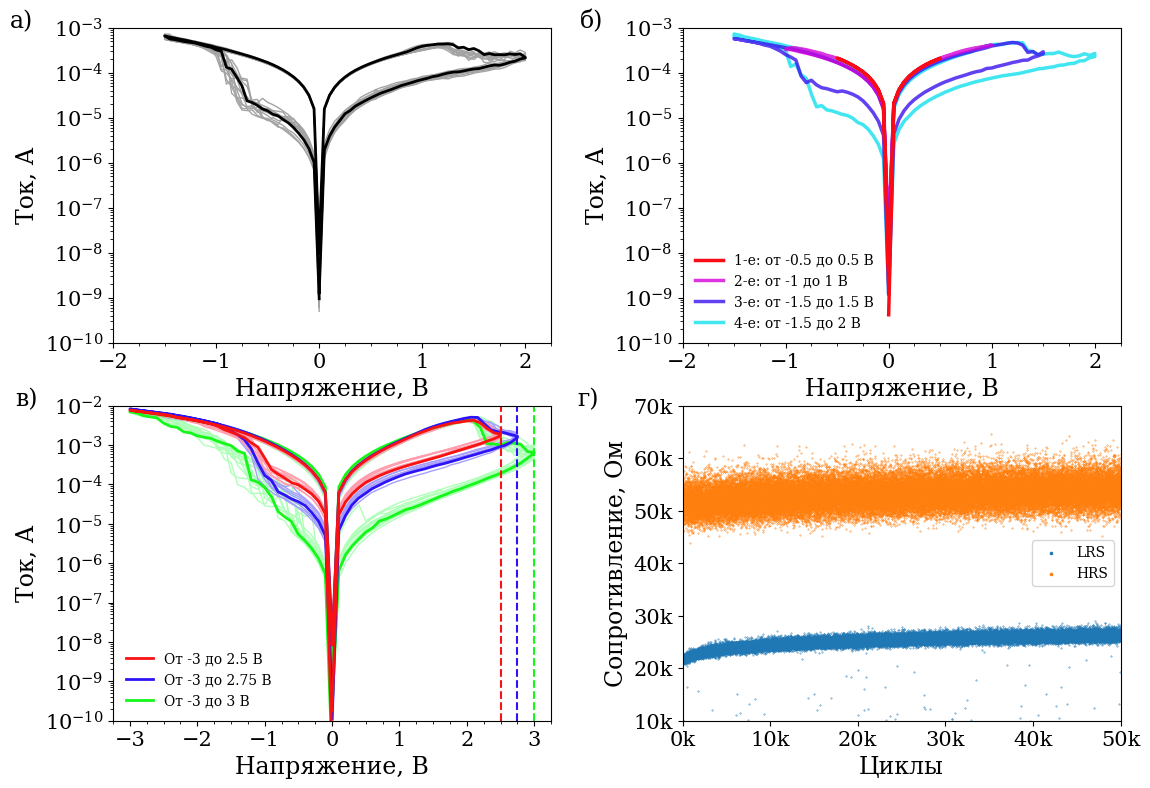

In [9]:
fig = plt.figure(figsize=(13, 9))
#fig.tight_layout(pad=5)
gs = GridSpec(ncols=2, nrows=2, figure=fig)
plt.rcParams.update({'font.family':'serif'})
ax_1 = fig.add_subplot(gs[0])
ax_2 = fig.add_subplot(gs[1])
ax_3 = fig.add_subplot(gs[2])
ax_4 = fig.add_subplot(gs[3])
y_major = ticker.LogLocator(numticks = 20)
y_minor = ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)

d.draw_multiple_lines('B17-100', ax_1, measurs= [i for i in range(32,44)], color = '#a3a3a3', linewidth = 1)
d.draw_single_line('B17-100', ax_1, 34, color = 'k', linewidth = 2)
ax_1.set(yscale='log', ylim=[10**(-10), 10**(-3)], xlim=[-2, 2.25])
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax_1.yaxis.set_major_locator(y_major)
ax_1.yaxis.set_minor_locator(y_minor)
ax_1.tick_params(labelsize=15)
ax_1.set_xlabel('Напряжение, В', size = 17, fontfamily = 'serif')
ax_1.set_ylabel('Ток, А', size = 17, fontfamily = 'serif')
ax_1.text(-3, 1e-3, 'a)', size = 17)

d.draw_single_line('B17-100', ax_2, 32, label = '4-е: от -1.5 до 2 В', color = '#13e0ed', alpha = 0.8, linewidth = 2.5)
d.draw_single_line('B17-100', ax_2, 8, label = '3-е: от -1.5 до 1.5 В', color = '#3b12ee', alpha = 0.8, linewidth = 2.5)
d.draw_single_line('B17-100', ax_2, 5, label = '2-е: от -1 до 1 В', color = '#d500d9', alpha = 0.8, linewidth = 2.5)
d.draw_single_line('B17-100', ax_2, 4, label = '1-е: от -0.5 до 0.5 В', color = '#f70c17', alpha = 1, linewidth = 2.5)
ax_2.set(yscale='log', ylim=[10**(-10), 10**(-3)], xlim=[-2, 2.25])
#ax_2.set_title('Деформовка', size = 17, fontfamily = 'serif')
ax_2.set_xlabel('Напряжение, В', size = 17, fontfamily = 'serif')
#ax_2.set_ylabel('Ток, А', size = 17, fontfamily = 'serif')
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax_2.yaxis.set_major_locator(y_major)
ax_2.yaxis.set_minor_locator(y_minor)
ax_2.tick_params(labelsize=15)
ax_2.legend(reverse = True, frameon = False, fontsize = 10, loc = 'lower left')
ax_2.set_ylabel('Ток, А', size = 17, fontfamily = 'serif')
ax_2.text(-3, 1e-3, 'б)', size = 17)

d_2.draw_multiple_lines('F10-100', ax_3, measurs=[i for i in range(92,106)], color = '#aeffb7', linewidth = 1)
d_2.draw_multiple_lines('F10-100', ax_3, measurs=[i for i in range(82,92) if i not in [83, 84]], color = '#a69eff', linewidth = 1)
d_2.draw_multiple_lines('F10-100', ax_3, measurs=[i for i in range(69,80) if i not in [74,75]], color = '#ff9eae', linewidth = 1)
d_2.draw_single_line('F10-100', ax_3, 100, color = '#14f719', linewidth = 2, label = 'От -3 до 3 В')
d_2.draw_single_line('F10-100', ax_3, 89, color = '#2d14f7', linewidth = 2, label = 'От -3 до 2.75 В')
d_2.draw_single_line('F10-100', ax_3, 76, color = '#f71313', linewidth = 2, label = 'От -3 до 2.5 В')
ax_3.plot([2.5,2.5], [10**(-10), 10**(-2)], '--', color = '#f71313')
ax_3.plot([2.75,2.75], [10**(-10), 10**(-2)], '--', color = '#2d14f7')
ax_3.plot([3,3], [10**(-10), 10**(-2)], '--', color = '#14f719')
ax_3.legend(reverse = True,frameon = False)
ax_3.yaxis.set_major_locator(y_major)
ax_3.yaxis.set_minor_locator(y_minor)
ax_3.set(yscale='log', ylim=[10**(-10), 10**(-2)], xlim=[-3.25, 3.25])
ax_3.set_xlabel('Напряжение, В', size = 17, fontfamily = 'serif')
ax_3.set_ylabel('Ток, А', size = 17, fontfamily = 'serif')
#ax_3.set_title('Множественные состояния', size = 17, fontfamily = 'serif')
ax_3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_3.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
y_major = ticker.LogLocator(numticks = 20)
y_minor = ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 20)
ax_3.yaxis.set_major_locator(y_major)
ax_3.yaxis.set_minor_locator(y_minor)
ax_3.tick_params(labelsize=15)
ax_3.text(-4.7, 1e-2, 'в)', size = 17)

ax_4.scatter(df[0], df[1], s = 0.1, label = 'LRS')
ax_4.scatter(df[0], df[2], s = 0.1, label = 'HRS')
ax_4.set(xlim = [0, 50000], ylim=[10000, 70000])
ax_4.set_xlabel('Циклы', size = 17, fontfamily = 'serif')
ax_4.set_ylabel('Сопротивление, Ом', size = 17, fontfamily = 'serif')
ax_4.xaxis.set_major_locator(ticker.FixedLocator([0, 10000, 20000, 30000, 40000, 50000]))
ax_4.set_xticklabels(['0k', '10k', '20k', '30k', '40k', '50k'])
ax_4.yaxis.set_major_locator(ticker.FixedLocator([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]))
ax_4.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '70k'])
#ax_4.xaxis.set_minor_locator(ticker.FixedLocator([0, 10000, 20000, 30000, 40000, 50000]))
#ax_4.xaxis.set_major_locator(ticker.FixedLocator(['0k', '10k', '20k', '30k', '40k', '50k']))
#ax_4.set_title('Endurance', size = 17, fontfamily = 'serif')
ax_4.tick_params(labelsize=15)
ax_4.legend(markerscale = 5)
ax_4.text(-12000, 70000, 'г)', size = 17)

gs.update(wspace=0.3, hspace = 0.2)

#plt.savefig('postann_e_beam_typical.png', dpi = 300, bbox_inches = 'tight')

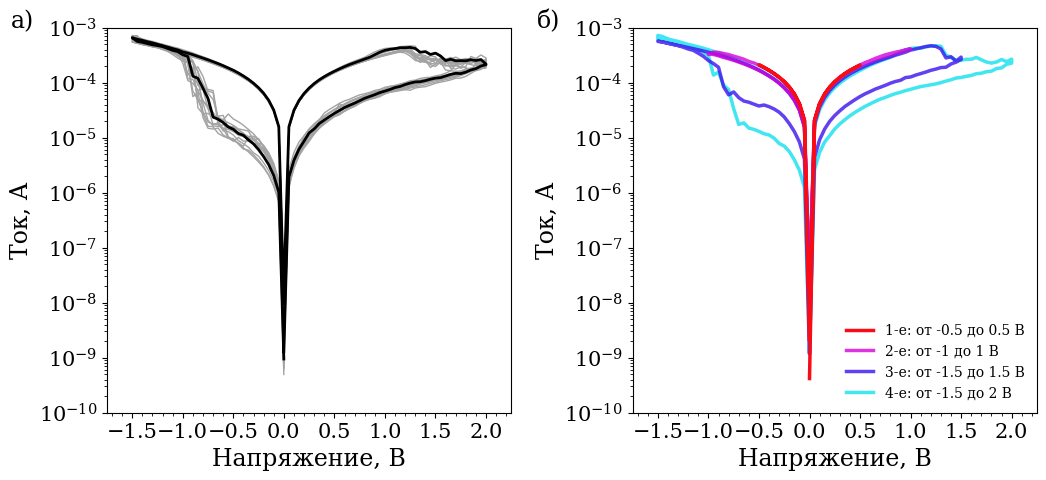

In [10]:
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(ncols=2, nrows=1, figure=fig)

ax_1 = fig.add_subplot(gs[0])
ax_2 = fig.add_subplot(gs[1])
y_major = ticker.LogLocator(numticks = 20)
y_minor = ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 20)

d.draw_multiple_lines('B17-100', ax_1, measurs= [i for i in range(32,44)], color = '#a3a3a3', linewidth = 1)
d.draw_single_line('B17-100', ax_1, 34, color = 'k', linewidth = 2)
ax_1.set(yscale='log', ylim=[10**(-10), 10**(-3)], xlim=[-1.75, 2.25])
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax_1.yaxis.set_major_locator(y_major)
ax_1.yaxis.set_minor_locator(y_minor)
ax_1.tick_params(labelsize=15)
ax_1.set_xlabel('Напряжение, В', size = 17, fontfamily = 'serif')
ax_1.set_ylabel('Ток, А', size = 17, fontfamily = 'serif')

ax_1.text(-2.7, 1e-3, 'a)', size = 17)

d.draw_single_line('B17-100', ax_2, 32, label = '4-е: от -1.5 до 2 В', color = '#13e0ed', alpha = 0.8, linewidth = 2.5)
d.draw_single_line('B17-100', ax_2, 8, label = '3-е: от -1.5 до 1.5 В', color = '#3b12ee', alpha = 0.8, linewidth = 2.5)
d.draw_single_line('B17-100', ax_2, 5, label = '2-е: от -1 до 1 В', color = '#d500d9', alpha = 0.8, linewidth = 2.5)
d.draw_single_line('B17-100', ax_2, 4, label = '1-е: от -0.5 до 0.5 В', color = '#f70c17', alpha = 1, linewidth = 2.5)
ax_2.set(yscale='log', ylim=[10**(-10), 10**(-3)], xlim=[-1.75, 2.25])
#ax_2.set_title('Деформовка', size = 17, fontfamily = 'serif')
ax_2.set_xlabel('Напряжение, В', size = 17, fontfamily = 'serif')
ax_2.set_ylabel('Ток, А', size = 17, fontfamily = 'serif')
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax_2.yaxis.set_major_locator(y_major)
ax_2.yaxis.set_minor_locator(y_minor)
ax_2.tick_params(labelsize=15)
ax_2.legend(loc = 'lower right', reverse = True, frameon = False)

ax_2.text(-2.7, 1e-3, 'б)', size = 17)

gs.update(wspace=0.3)
#plt.savefig('postann_e_beam_typical.png', dpi = 300, bbox_inches = 'tight')

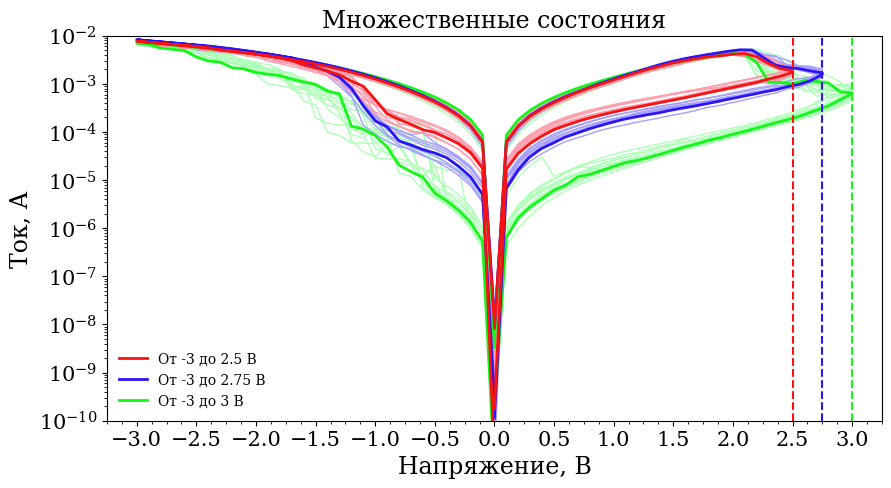

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))

y_major = ticker.LogLocator(numticks = 20)
y_minor = ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
d_2.draw_multiple_lines('F10-100', ax, measurs=[i for i in range(92,106)], color = '#aeffb7', linewidth = 1)
d_2.draw_multiple_lines('F10-100', ax, measurs=[i for i in range(82,92) if i not in [83, 84]], color = '#a69eff', linewidth = 1)
d_2.draw_multiple_lines('F10-100', ax, measurs=[i for i in range(69,80) if i not in [74,75]], color = '#ff9eae', linewidth = 1)
d_2.draw_single_line('F10-100', ax, 100, color = '#14f719', linewidth = 2, label = 'От -3 до 3 В')
d_2.draw_single_line('F10-100', ax, 89, color = '#2d14f7', linewidth = 2, label = 'От -3 до 2.75 В')
d_2.draw_single_line('F10-100', ax, 76, color = '#f71313', linewidth = 2, label = 'От -3 до 2.5 В')
ax.plot([2.5,2.5], [10**(-10), 10**(-2)], '--', color = '#f71313')
ax.plot([2.75,2.75], [10**(-10), 10**(-2)], '--', color = '#2d14f7')
ax.plot([3,3], [10**(-10), 10**(-2)], '--', color = '#14f719')
ax.legend(reverse = True,frameon = False)
ax.yaxis.set_major_locator(y_major)
ax.yaxis.set_minor_locator(y_minor)
ax.set(yscale='log', ylim=[10**(-10), 10**(-2)], xlim=[-3.25, 3.25])
ax.set_xlabel('Напряжение, В', size = 17, fontfamily = 'serif')
ax.set_ylabel('Ток, А', size = 17, fontfamily = 'serif')
ax.set_title('Множественные состояния', size = 17, fontfamily = 'serif')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.125))
y_major = ticker.LogLocator(numticks = 20)
y_minor = ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 20)
ax.yaxis.set_major_locator(y_major)
ax.yaxis.set_minor_locator(y_minor)
ax.tick_params(labelsize=15)
#plt.savefig('states.png', dpi = 300, bbox_inches = 'tight')

In [12]:
df = pd.read_csv('sample_4.2_2\\F12-100_3.csv', 
                                delimiter=';', 
                                skiprows=16, 
                                engine='python', 
                                header=None, 
                                encoding='ISO-8859-1').astype(np.float32)
df[0] = df[0].iloc[:50000]
df[1] = df[1][df[1] > 10000].iloc[:50000]
df[2] = df[2][df[2] > 40000].iloc[:50000]
df.dropna(inplace=True)

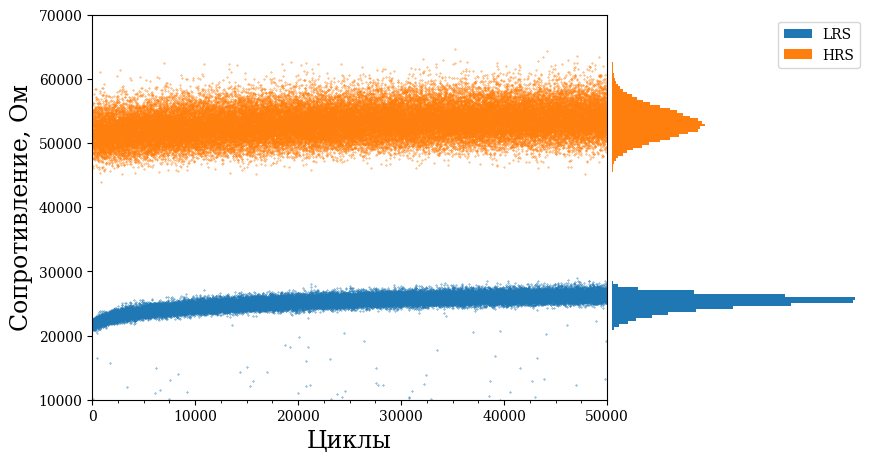

In [13]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(ncols=3, nrows=1, figure=fig)

ax_1 = fig.add_subplot(gs[:2])
ax_2 = fig.add_subplot(gs[2])
ax_2.axis('off')

ax_1.scatter(df[0], df[1], s = 0.1, label = 'LRS')
ax_1.scatter(df[0], df[2], s = 0.1, label = 'HRS')

ax_1.set(xlim = [0, 50000], ylim=[10000, 70000])
ax_1.set_xlabel('Циклы', size = 17, fontfamily = 'serif')
ax_1.set_ylabel('Сопротивление, Ом', size = 17, fontfamily = 'serif')
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(10000))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(2500))

ax_2.hist(df[1], bins=40, orientation = 'horizontal', label = 'LRS')
ax_2.hist(df[2], bins=50, orientation = 'horizontal', label = 'HRS')
ax_2.set_ylim(ax_1.get_ylim())
ax_2.legend()
gs.update(wspace=0.02)

#plt.savefig('endurance.png', dpi = 300, bbox_inches = 'tight')

In [14]:
np.mean(np.array(df[2]) / np.array(df[1]))

2.1128054